In [1]:
## R code 8.1
num_weeks <- 1e5
positions <- rep(0,num_weeks)
current <- 10
for ( i in 1:num_weeks ) {
    # record current position
    positions[i] <- current

    # flip coin to generate proposal
    proposal <- current + sample( c(-1,1) , size=1 )
    # now make sure he loops around the archipelago
    if ( proposal < 1 ) proposal <- 10
    if ( proposal > 10 ) proposal <- 1

    # move?
    prob_move <- proposal/current
    current <- ifelse( runif(1) < prob_move , proposal , current )
}

In [2]:
## R code 8.2
library(rethinking)
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


In [3]:
## R code 8.3
m8.1 <- map(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa ,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dunif(0,10)
    ) ,
    data=dd )
precis(m8.1)

       Mean StdDev  5.5% 94.5%
a      9.22   0.14  9.00  9.44
bR    -0.20   0.08 -0.32 -0.08
bA    -1.95   0.22 -2.31 -1.59
bAR    0.39   0.13  0.19  0.60
sigma  0.93   0.05  0.85  1.01

In [4]:
## R code 8.4
dd.trim <- dd[ , c("log_gdp","rugged","cont_africa") ]
str(dd.trim)

'data.frame':	170 obs. of  3 variables:
 $ log_gdp    : num  7.49 8.22 9.93 9.41 7.79 ...
 $ rugged     : num  0.858 3.427 0.769 0.775 2.688 ...
 $ cont_africa: int  1 0 0 0 0 0 0 0 0 1 ...


In [5]:
## R code 8.5
m8.1stan <- map2stan(
    alist(
        log_gdp ~ dnorm( mu , sigma ) ,
        mu <- a + bR*rugged + bA*cont_africa + bAR*rugged*cont_africa ,
        a ~ dnorm(0,100),
        bR ~ dnorm(0,10),
        bA ~ dnorm(0,10),
        bAR ~ dnorm(0,10),
        sigma ~ dcauchy(0,2)
    ) ,
    data=dd.trim )


SAMPLING FOR MODEL 'log_gdp ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1, Iteration: 2000 / 2000 [100%]  (Sampling)# 
#  Elapsed Time: 1.60278 seconds (Warm-up)
#                1.42514 seconds (Sampling)
#                3.02792 seconds (Total)
# 

SAMPLING FOR MODEL 'log_gdp ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 2e-06 seconds (Warm-up)
#                0.000442 seconds (Sampling)
#   

Computing WAIC
Constructing posterior predictions


[ 1000 / 1000 ]


In [6]:
## R code 8.6
precis(m8.1stan)

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a      9.22   0.14       9.00       9.44   169 1.01
bR    -0.20   0.08      -0.31      -0.07   231 1.01
bA    -1.94   0.23      -2.27      -1.55   200 1.01
bAR    0.39   0.14       0.18       0.60   230 1.01
sigma  0.95   0.05       0.86       1.03   544 1.00

In [7]:
## R code 8.7
m8.1stan_4chains <- map2stan( m8.1stan , chains=4 , cores=4 )
precis(m8.1stan_4chains)


SAMPLING FOR MODEL 'log_gdp ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000407 seconds (Sampling)
#                0.00041 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 4000 / 4000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a      9.23   0.14       9.00       9.45  1035 1.00
bR    -0.21   0.08      -0.33      -0.08   970 1.00
bA    -1.95   0.23      -2.31      -1.56  1100 1.00
bAR    0.39   0.14       0.17       0.61  1016 1.01
sigma  0.95   0.05       0.87       1.04  1772 1.00

In [8]:
## R code 8.8
post <- extract.samples( m8.1stan )
str(post)

List of 5
 $ a    : num [1:1000(1d)] 9.29 9.05 9.2 9.14 9.2 ...
 $ bR   : num [1:1000(1d)] -0.284 -0.134 -0.177 -0.17 -0.212 ...
 $ bA   : num [1:1000(1d)] -2.08 -1.76 -1.79 -1.97 -1.78 ...
 $ bAR  : num [1:1000(1d)] 0.572 0.32 0.356 0.449 0.204 ...
 $ sigma: num [1:1000(1d)] 0.891 0.857 0.936 0.89 0.849 ...


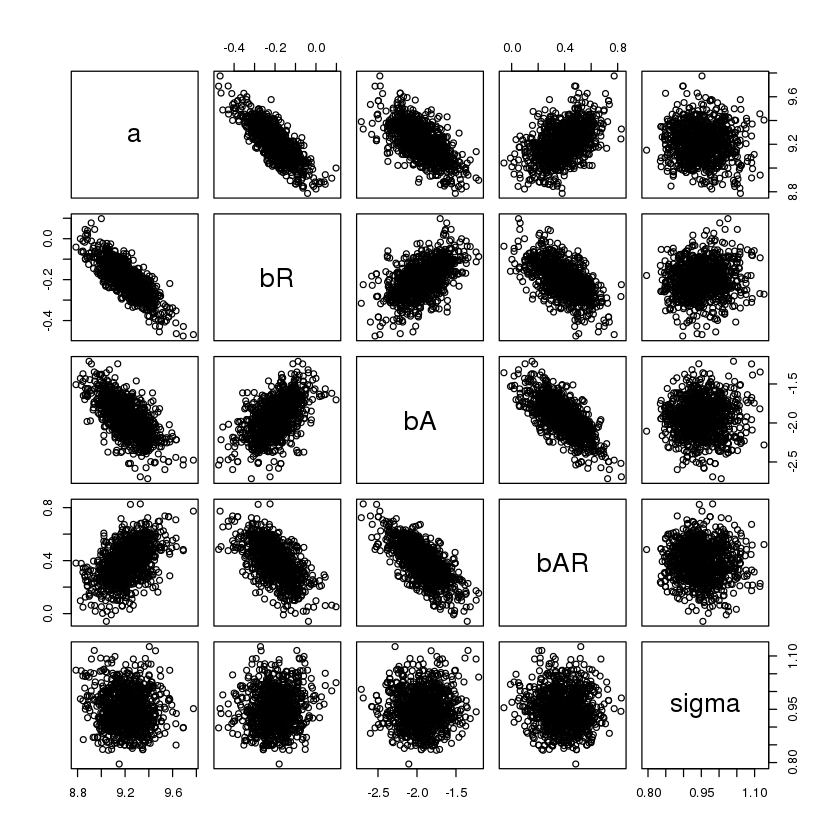

In [9]:
## R code 8.9
pairs(post)

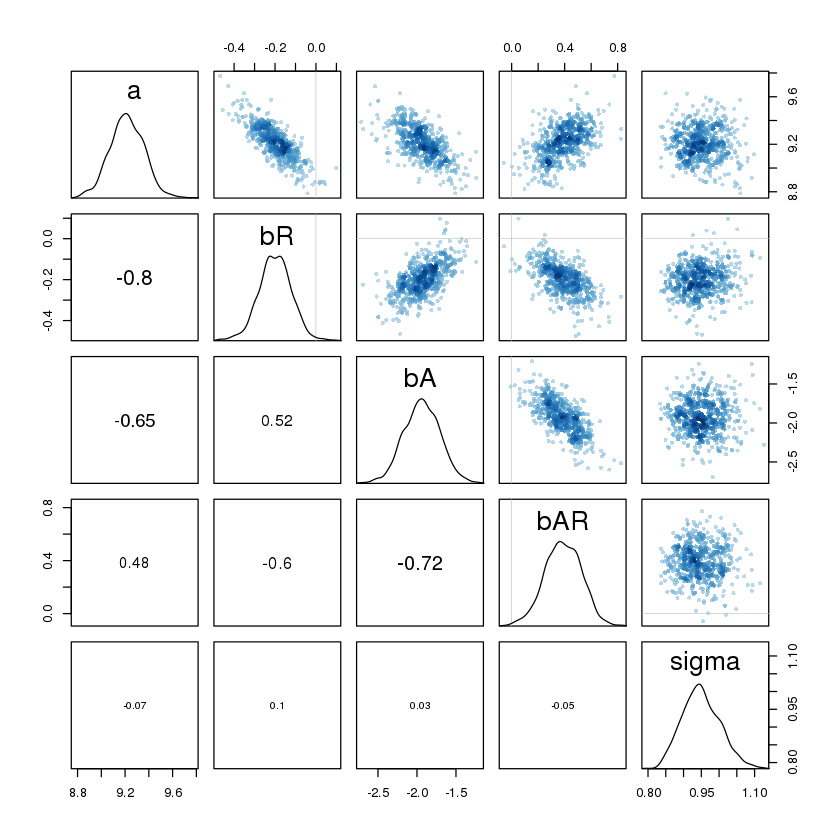

In [10]:
## R code 8.10
pairs(m8.1stan)

In [11]:
## R code 8.11
show(m8.1stan)

map2stan model fit
1000 samples from 1 chain

Formula:
log_gdp ~ dnorm(mu, sigma)
mu <- a + bR * rugged + bA * cont_africa + bAR * rugged * cont_africa
a ~ dnorm(0, 100)
bR ~ dnorm(0, 10)
bA ~ dnorm(0, 10)
bAR ~ dnorm(0, 10)
sigma ~ dcauchy(0, 2)

Log-likelihood at expected values: -229.43 
Deviance: 458.86 
DIC: 468.84 
Effective number of parameters (pD): 4.99 

WAIC (SE): 469.39 (14.8)
pWAIC: 5.16 


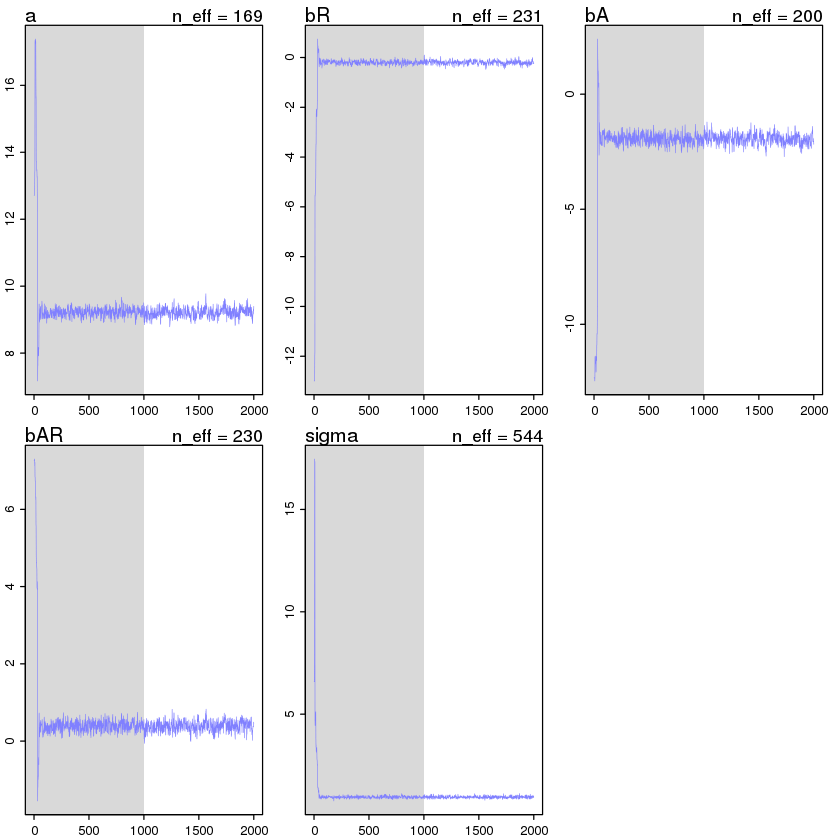

In [12]:
## R code 8.12
plot(m8.1stan)

In [13]:
## R code 8.13
y <- c(-1,1)
m8.2 <- map2stan(
    alist(
        y ~ dnorm( mu , sigma ) ,
        mu <- alpha
    ) ,
    data=list(y=y) , start=list(alpha=0,sigma=1) ,
    chains=2 , iter=4000 , warmup=1000 )


SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1001 / 4000 [ 25%]  (Sampling)
Chain 1, Iteration: 1400 / 4000 [ 35%]  (Sampling)
Chain 1, Iteration: 1800 / 4000 [ 45%]  (Sampling)
Chain 1, Iteration: 2200 / 4000 [ 55%]  (Sampling)
Chain 1, Iteration: 2600 / 4000 [ 65%]  (Sampling)
Chain 1, Iteration: 3000 / 4000 [ 75%]  (Sampling)
Chain 1, Iteration: 3400 / 4000 [ 85%]  (Sampling)
Chain 1, Iteration: 3800 / 4000 [ 95%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 1.22031 seconds (Warm-up)
#                5.75597 seconds (Sampling)
#                6.97628 seconds (Total)
# 

SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (Warm

Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(y ~ dnorm(mu, sigma), mu <- alpha), data = list(y = y), : There were 370 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

In [14]:
## R code 8.14
precis(m8.2)

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In precis(m8.2): There were 370 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

            Mean      StdDev    lower 0.89 upper 0.89 n_eff Rhat
alpha -624429514  2804525718 -2.942901e+09  761454484    10 1.20
sigma 6855018377 61060527847  9.546730e+03 6364465407    59 1.02

In [15]:
## R code 8.15
m8.3 <- map2stan(
    alist(
        y ~ dnorm( mu , sigma ) ,
        mu <- alpha ,
        alpha ~ dnorm( 1 , 10 ) ,
        sigma ~ dcauchy( 0 , 1 )
    ) ,
    data=list(y=y) , start=list(alpha=0,sigma=1) ,
    chains=2 , iter=4000 , warmup=1000 )
precis(m8.3)


SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1001 / 4000 [ 25%]  (Sampling)
Chain 1, Iteration: 1400 / 4000 [ 35%]  (Sampling)
Chain 1, Iteration: 1800 / 4000 [ 45%]  (Sampling)
Chain 1, Iteration: 2200 / 4000 [ 55%]  (Sampling)
Chain 1, Iteration: 2600 / 4000 [ 65%]  (Sampling)
Chain 1, Iteration: 3000 / 4000 [ 75%]  (Sampling)
Chain 1, Iteration: 3400 / 4000 [ 85%]  (Sampling)
Chain 1, Iteration: 3800 / 4000 [ 95%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 0.139168 seconds (Warm-up)
#                0.324303 seconds (Sampling)
#                0.463471 seconds (Total)
# 

SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (W

Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

      Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
alpha 0.05   1.54      -1.96       2.15   865    1
sigma 1.87   1.67       0.45       3.20   888    1

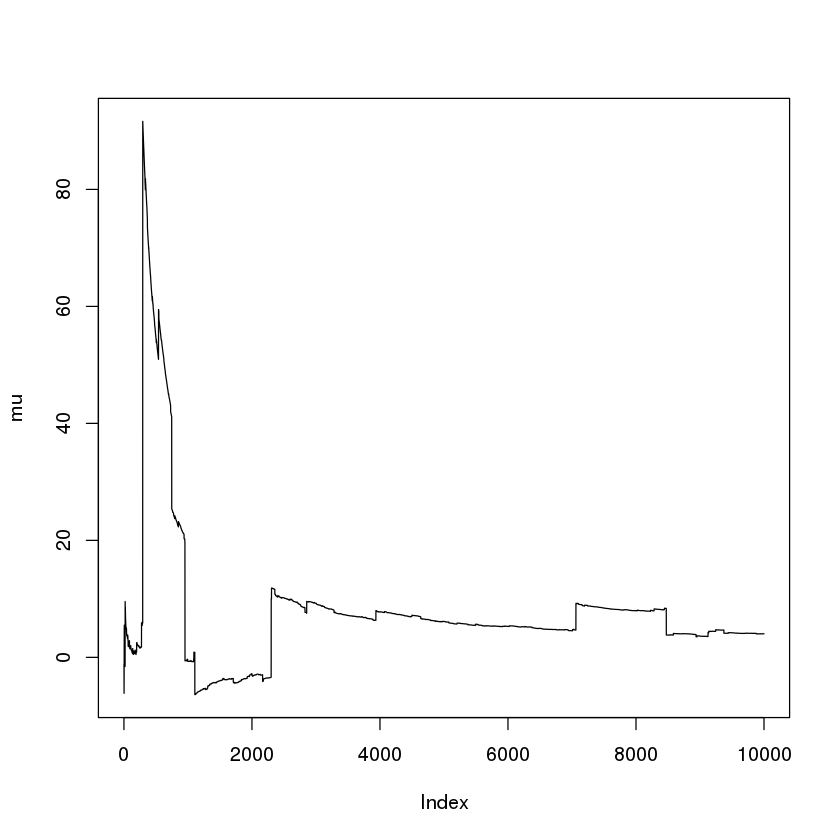

In [16]:
## R code 8.16
y <- rcauchy(1e4,0,5)
mu <- sapply( 1:length(y) , function(i) sum(y[1:i])/i )
plot(mu,type="l")

In [17]:
## R code 8.17
y <- rnorm( 100 , mean=0 , sd=1 )

In [18]:
## R code 8.18
m8.4 <- map2stan(
    alist(
        y ~ dnorm( mu , sigma ) ,
        mu <- a1 + a2 ,
        sigma ~ dcauchy( 0 , 1 )
    ) ,
    data=list(y=y) , start=list(a1=0,a2=0,sigma=1) ,
    chains=2 , iter=4000 , warmup=1000 )
precis(m8.4)


SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1001 / 4000 [ 25%]  (Sampling)
Chain 1, Iteration: 1400 / 4000 [ 35%]  (Sampling)
Chain 1, Iteration: 1800 / 4000 [ 45%]  (Sampling)
Chain 1, Iteration: 2200 / 4000 [ 55%]  (Sampling)
Chain 1, Iteration: 2600 / 4000 [ 65%]  (Sampling)
Chain 1, Iteration: 3000 / 4000 [ 75%]  (Sampling)
Chain 1, Iteration: 3400 / 4000 [ 85%]  (Sampling)
Chain 1, Iteration: 3800 / 4000 [ 95%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 55.6206 seconds (Warm-up)
#                203.955 seconds (Sampling)
#                259.575 seconds (Total)
# 

SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (Warm

The following numerical problems occured the indicated number of times after warmup on chain 2
                                                                                count
Exception thrown at line 16: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 2e-06 seconds (Warm-up)
#                0.000248 seconds (Sampling)
#                0.00025 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

          Mean  StdDev lower 0.89 upper 0.89 n_eff Rhat
a1    -1839.78 1571.77   -4153.62     598.55     2 1.84
a2     1839.83 1571.77    -598.41    4153.85     2 1.84
sigma     0.98    0.07       0.88       1.10    19 1.06

In [19]:
## R code 8.19
m8.5 <- map2stan(
    alist(
        y ~ dnorm( mu , sigma ) ,
        mu <- a1 + a2 ,
        a1 ~ dnorm( 0 , 10 ) ,
        a2 ~ dnorm( 0 , 10 ) ,
        sigma ~ dcauchy( 0 , 1 )
    ) ,
    data=list(y=y) , start=list(a1=0,a2=0,sigma=1) ,
    chains=2 , iter=4000 , warmup=1000 )
precis(m8.5)


SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1001 / 4000 [ 25%]  (Sampling)
Chain 1, Iteration: 1400 / 4000 [ 35%]  (Sampling)
Chain 1, Iteration: 1800 / 4000 [ 45%]  (Sampling)
Chain 1, Iteration: 2200 / 4000 [ 55%]  (Sampling)
Chain 1, Iteration: 2600 / 4000 [ 65%]  (Sampling)
Chain 1, Iteration: 3000 / 4000 [ 75%]  (Sampling)
Chain 1, Iteration: 3400 / 4000 [ 85%]  (Sampling)
Chain 1, Iteration: 3800 / 4000 [ 95%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 7.65385 seconds (Warm-up)
#                29.1887 seconds (Sampling)
#                36.8426 seconds (Total)
# 

SAMPLING FOR MODEL 'y ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (Warm

Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

       Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a1     0.17   7.09     -11.20      11.66   843    1
a2    -0.11   7.09     -11.67      11.24   840    1
sigma  1.00   0.07       0.89       1.12  1266    1

In [20]:
## R code 8.20
mp <- map2stan(
    alist(
        a ~ dnorm(0,1),
        b ~ dcauchy(0,1)
    ),
    data=list(y=1),
    start=list(a=0,b=0),
    iter=1e4, warmup=100 , WAIC=FALSE )


SAMPLING FOR MODEL 'a ~ dnorm(0, 1)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration:  101 / 10000 [  1%]  (Sampling)
Chain 1, Iteration: 1100 / 10000 [ 11%]  (Sampling)
Chain 1, Iteration: 2100 / 10000 [ 21%]  (Sampling)
Chain 1, Iteration: 3100 / 10000 [ 31%]  (Sampling)
Chain 1, Iteration: 4100 / 10000 [ 41%]  (Sampling)
Chain 1, Iteration: 5100 / 10000 [ 51%]  (Sampling)
Chain 1, Iteration: 6100 / 10000 [ 61%]  (Sampling)
Chain 1, Iteration: 7100 / 10000 [ 71%]  (Sampling)
Chain 1, Iteration: 8100 / 10000 [ 81%]  (Sampling)
Chain 1, Iteration: 9100 / 10000 [ 91%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 0.009242 seconds (Warm-up)
#                1.26282 seconds (Sampling)
#                1.27206 seconds (Total)
# 

SAMPLING FOR MODEL 'a ~ dnorm(0, 1)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 4e-06 seconds (Warm-up)
#                0.000193 seconds (Sampling)
# 

In [21]:
## R code 8.21
N <- 100                          # number of individuals
height <- rnorm(N,10,2)           # sim total height of each
leg_prop <- runif(N,0.4,0.5)      # leg as proportion of height
leg_left <- leg_prop*height +     # sim left leg as proportion + error
    rnorm( N , 0 , 0.02 )
leg_right <- leg_prop*height +    # sim right leg as proportion + error
    rnorm( N , 0 , 0.02 )
                                  # combine into data frame
d <- data.frame(height,leg_left,leg_right)

In [22]:
## R code 8.22
m5.8s <- map2stan(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) ,
        sigma ~ dcauchy( 0 , 1 )
    ) ,
    data=d, chains=4,
    start=list(a=10,bl=0,br=0,sigma=1) )


SAMPLING FOR MODEL 'height ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1, Iteration: 2000 / 2000 [100%]  (Sampling)# 
#  Elapsed Time: 33.3431 seconds (Warm-up)
#                49.8349 seconds (Sampling)
#                83.178 seconds (Total)
# 

SAMPLING FOR MODEL 'height ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 2, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 2, Iteration:  400 / 2000 [ 20%]  (W

Computing WAIC
Constructing posterior predictions


[ 4000 / 4000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [23]:
## R code 8.23
m5.8s2 <- map2stan(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + bl*leg_left + br*leg_right ,
        a ~ dnorm( 10 , 100 ) ,
        bl ~ dnorm( 2 , 10 ) ,
        br ~ dnorm( 2 , 10 ) & T[0,] ,
        sigma ~ dcauchy( 0 , 1 )
    ) ,
    data=d, chains=4,
    start=list(a=10,bl=0,br=0,sigma=1) )


SAMPLING FOR MODEL 'height ~ dnorm(mu, sigma)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1, Iteration: 2000 / 2000 [100%]  (Sampling)# 
#  Elapsed Time: 30.8135 seconds (Warm-up)
#                26.4792 seconds (Sampling)
#                57.2927 seconds (Total)
# 

SAMPLING FOR MODEL 'height ~ dnorm(mu, sigma)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 2, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 2, Iteration:  400 / 2000 [ 20%]  (

Computing WAIC
Constructing posterior predictions


[ 4000 / 4000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(height ~ dnorm(mu, sigma), mu <- a + bl * leg_left + : There were 956 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.